 
<div style="background-color: olive; padding: 40px; font-size: 40px;">
         Time Series EDA
    
    
</div>

 - Time Series Train-Test Split
 - 1 Human-based
 - 2 Percentage Based
 - 3 Cross Validate Splits
 - 10 Weird Time Series Visualizations to Impress Your Friends and Family (Doctors Hate Her)
 - 1 Blow off the time series
 - 2 y over time
 - 3 y averaged over various periods over time
 - 4 change in y over time
 - 5 Seasonal Plot
 - 6 Seasonal Subseries Plot
 - 7 Lag Plot
 - 8 Autocorrelation Plot
 - 9 Seasonal Decomposition
 - 10 Area Plots
 - Aside: working with dates in matplotlib
 - Aside: strftime

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import warnings
import acquire
import prepare as p
warnings.filterwarnings('ignore')

# plotting defaults
plt.rc('figure', figsize=(11, 5))
# plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)


For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [8]:
# acquire and prepare the data

df = p.prep_store_data()

In [9]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,January,Tuesday,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,25.16


In [4]:
df.head(3)

,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,store_id,item_id,sale_amount,store_id,month,day of the week,sales_total
sale_date,,,,,,,,,,,,,,
2013-01-01,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,1,1,13,1,January,Tuesday,10.92
2013-01-02,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,1,1,11,1,January,Wednesday,9.24
2013-01-03,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,1,1,14,1,January,Thursday,11.76


In [ ]:
histograms = prepare.display_numeric_column_histograms(df)

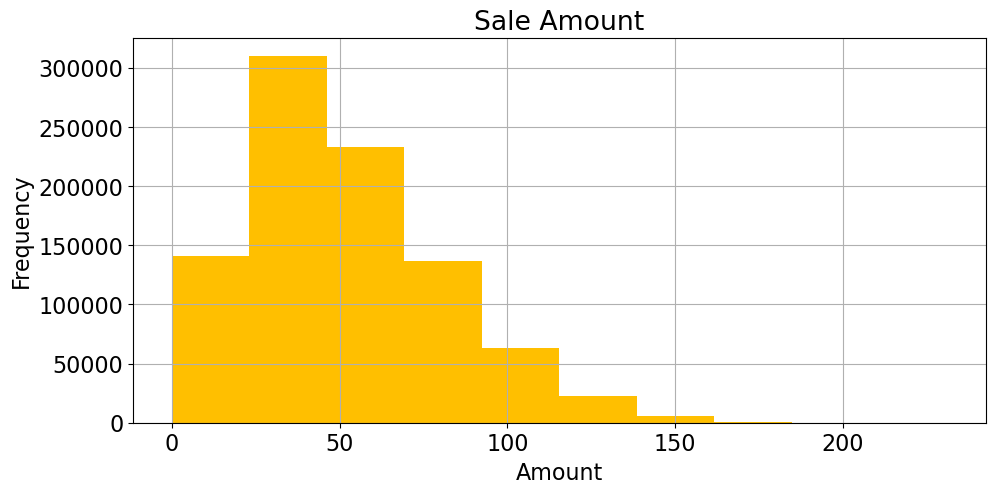

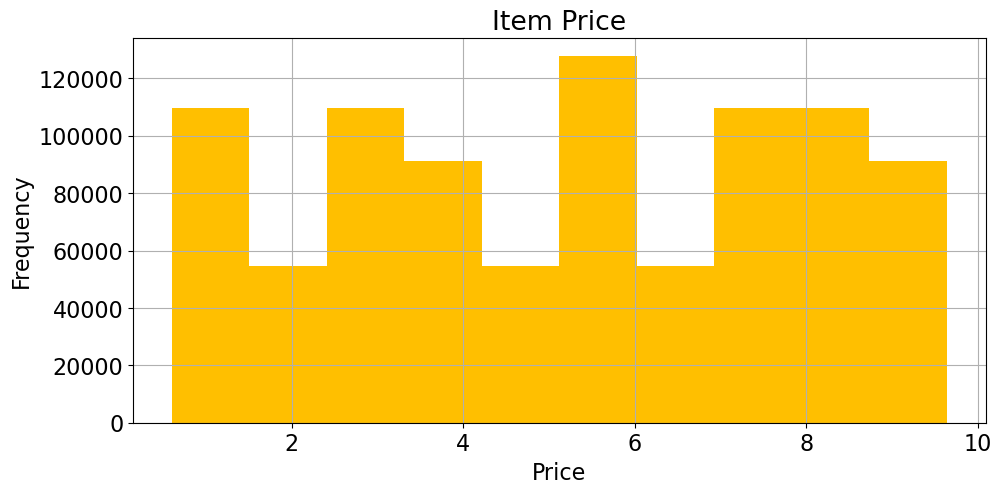

In [7]:
# Define amber color (hexadecimal value)
amber_color = "#FFBF00"  # You can adjust the color code as needed

# Histogram of sale_amount with amber bars
df['sale_amount'].hist(color=amber_color)
plt.title('Sale Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Histogram of item_price with amber bars
df['item_price'].hist(color=amber_color)
plt.title('Item Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [7]:
# A detailed look. I'm thinking of dropping some column
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_id          913000 non-null  int64  
 1   item_upc14       913000 non-null  object 
 2   item_upc12       913000 non-null  object 
 3   item_brand       913000 non-null  object 
 4   item_name        913000 non-null  object 
 5   item_price       913000 non-null  float64
 6   sale_id          913000 non-null  int64  
 7   store_id         913000 non-null  int64  
 8   item_id          913000 non-null  int64  
 9   sale_amount      913000 non-null  int64  
 10  store_id         913000 non-null  int64  
 11  month            913000 non-null  object 
 12  day of the week  913000 non-null  object 
 13  sales_total      913000 non-null  float64
dtypes: float64(2), int64(6), object(6)
memory usage: 104.5+ MB


In [8]:
df.shape

(913000, 14)

In [ ]:
# Dropped columns. upc14 was redundant. All stores are in SA, TX. I have item_id, so I don't need the name or the brand

#df = df.drop(['store_state', 'store_city', 'store_address', 'item_name', 'item_upc14', 'item_brand'], axis=1)
df = df.drop(['item_brand', 'item_name', 'item_upc14', 'item_brand','store_id'], axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_id          913000 non-null  int64  
 1   item_upc12       913000 non-null  object 
 2   item_price       913000 non-null  float64
 3   sale_id          913000 non-null  int64  
 4   store_id         913000 non-null  int64  
 5   item_id          913000 non-null  int64  
 6   sale_amount      913000 non-null  int64  
 7   store_id         913000 non-null  int64  
 8   month            913000 non-null  object 
 9   day of the week  913000 non-null  object 
 10  sales_total      913000 non-null  float64
dtypes: float64(2), int64(6), object(3)
memory usage: 83.6+ MB


In [ ]:
##############correct 2 store_id

In [12]:
df.head()

,item_id,item_upc12,item_price,sale_id,store_id,item_id,sale_amount,store_id,month,day of the week,sales_total
sale_date,,,,,,,,,,,
2013-01-01,1,35200264013,0.84,1,1,1,13,1,January,Tuesday,10.92
2013-01-02,1,35200264013,0.84,2,1,1,11,1,January,Wednesday,9.24
2013-01-03,1,35200264013,0.84,3,1,1,14,1,January,Thursday,11.76
2013-01-04,1,35200264013,0.84,4,1,1,13,1,January,Friday,10.92
2013-01-05,1,35200264013,0.84,5,1,1,10,1,January,Saturday,8.40


In [13]:
# How many stores do I have?

df.store_id.nunique()

store_id    10
store_id    10
dtype: int64

In [15]:
# Use 70/30 train test split %

train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)
test_start_index

639100

In [16]:
# Create train and test dataframe

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

In [17]:
train.head()

,item_id,item_upc12,item_price,sale_id,store_id,item_id,sale_amount,store_id,month,day of the week,sales_total
sale_date,,,,,,,,,,,
2013-01-01,1,35200264013,0.84,1,1,1,13,1,January,Tuesday,10.92
2013-01-02,1,35200264013,0.84,2,1,1,11,1,January,Wednesday,9.24
2013-01-03,1,35200264013,0.84,3,1,1,14,1,January,Thursday,11.76
2013-01-04,1,35200264013,0.84,4,1,1,13,1,January,Friday,10.92
2013-01-05,1,35200264013,0.84,5,1,1,10,1,January,Saturday,8.40


In [18]:
# Set target as y - in this case using previous sales to predict future sales

y = train.sale_amount
y.head()

sale_date
2013-01-01    13
2013-01-02    11
2013-01-03    14
2013-01-04    13
2013-01-05    10
Name: sale_amount, dtype: int64

<Axes: ylabel='Frequency'>

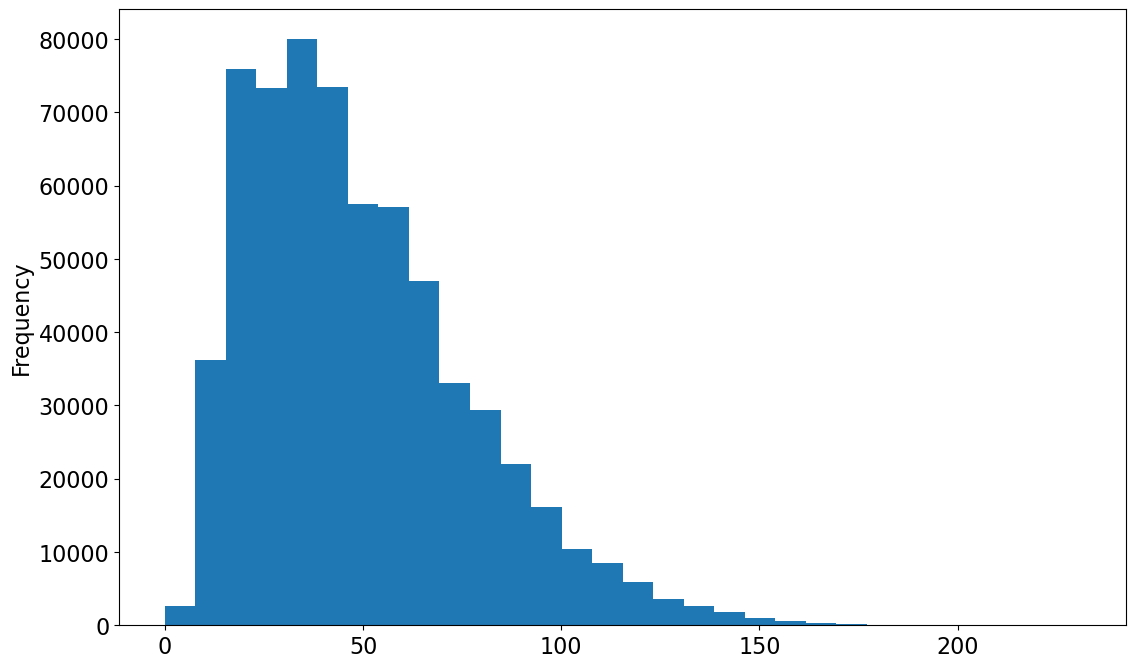

In [19]:
# Don't consider the time series

plt.figure(figsize=(13,8))
y.plot.hist(bins=30)

<Axes: xlabel='month'>

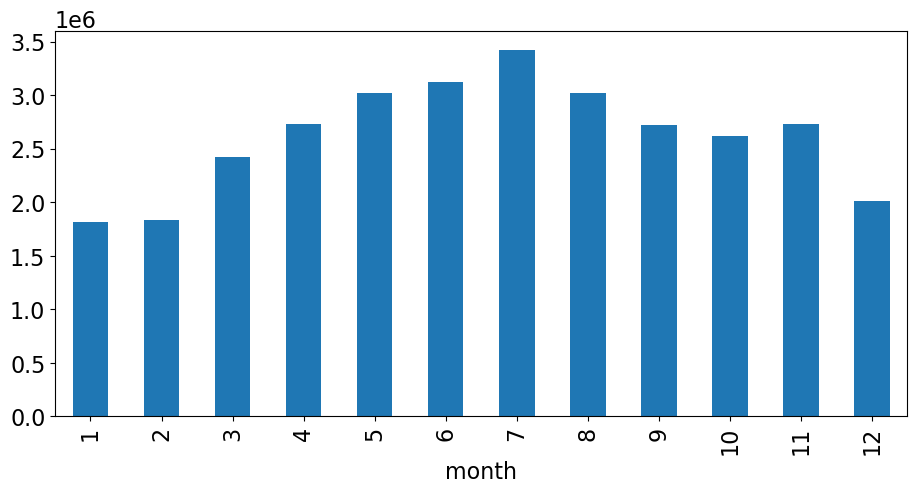

In [20]:
# Sales by month: all stores, all products

train['month'] = train.index.month
train.groupby('month').sale_amount.sum().plot.bar()

<Axes: xlabel='weekday', ylabel='sale_amount'>

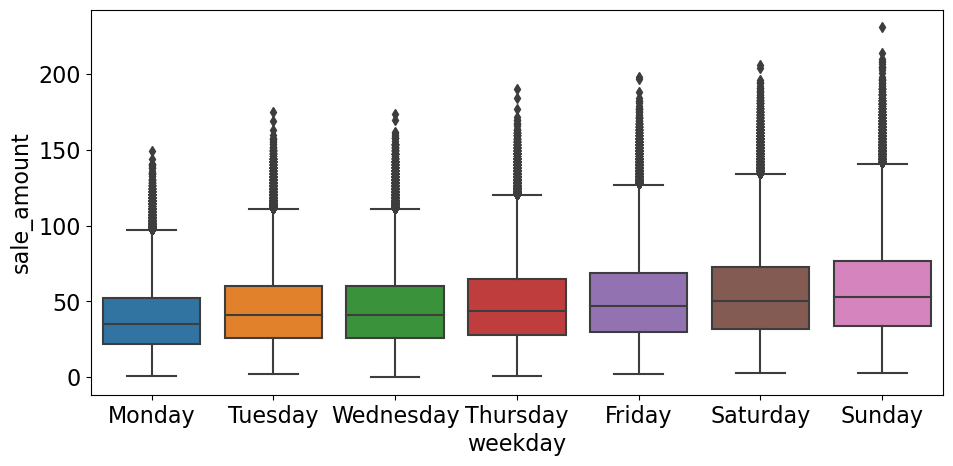

In [21]:
# Boxplot by day of the week

train['weekday'] = train.index.day_name()
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.boxplot(data=train, y='sale_amount', x='weekday', order=order)

<Axes: xlabel='sale_date'>

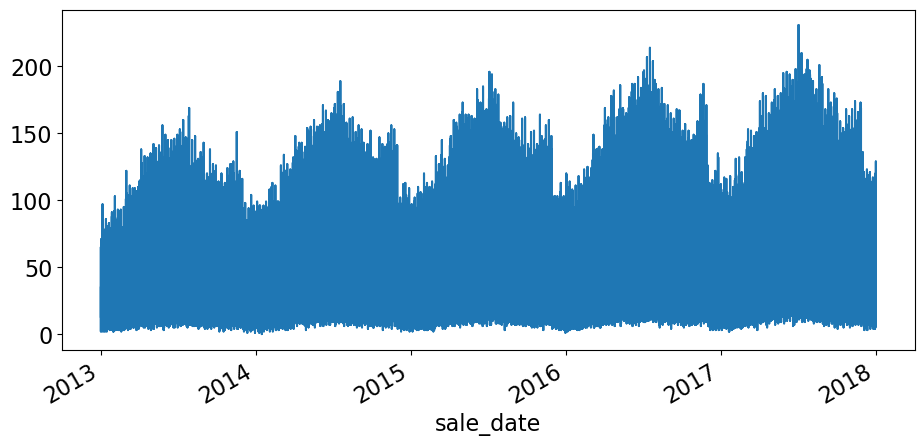

In [22]:
# Visualize the target over time

y.plot()

<Axes: title={'center': 'weekly average'}, xlabel='sale_date'>

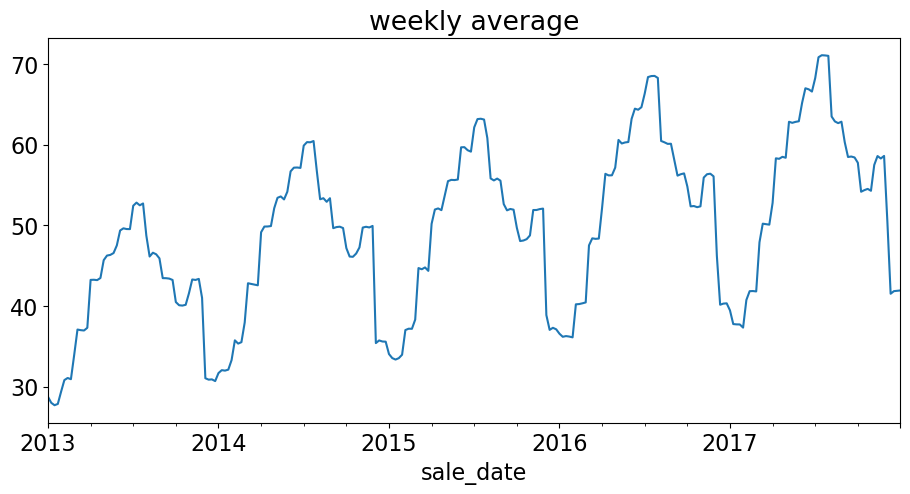

In [23]:
# Visualize weekly average sales

y.resample('W').mean().plot(title='weekly average')

<Axes: title={'center': 'monthly'}, xlabel='sale_date'>

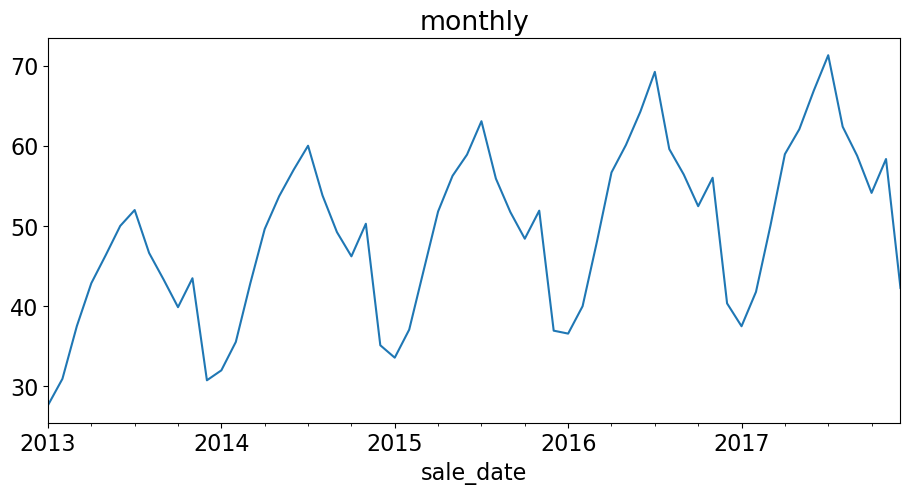

In [24]:
# Visualize monthly average sales

y.resample('M').mean().plot(title='monthly')


<Axes: xlabel='sale_date'>

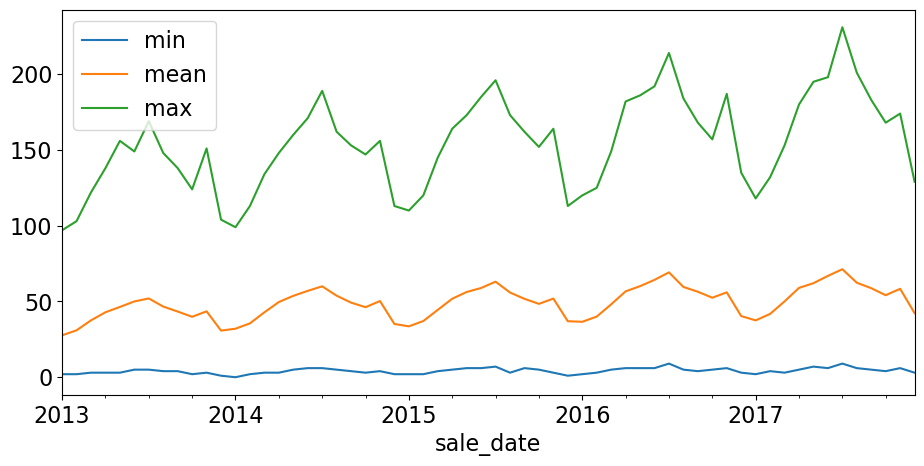

In [25]:
# Visualize monthly min, mean, max sales

y.resample('M').agg(['min', 'mean', 'max']).plot()


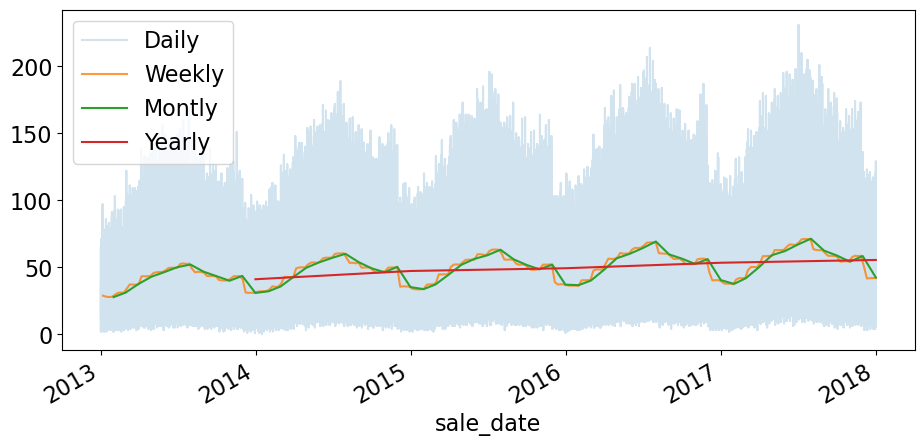

In [26]:
# Comparison

y.plot(alpha=.2, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

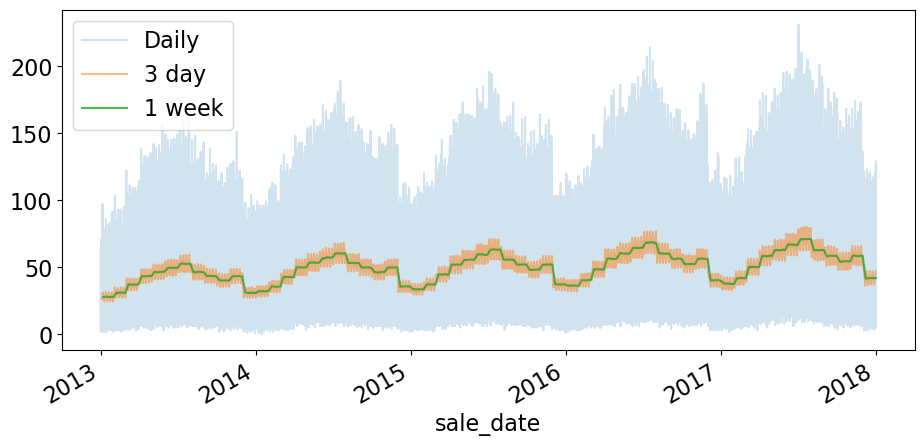

In [30]:
# Plot the rolling avg

y.plot(alpha=.2, label='Daily')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
plt.legend()

In [ ]:
Germany data

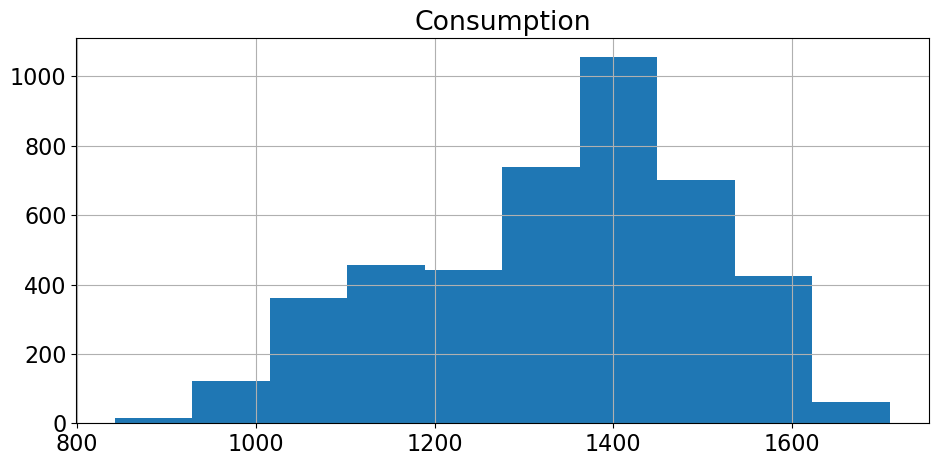

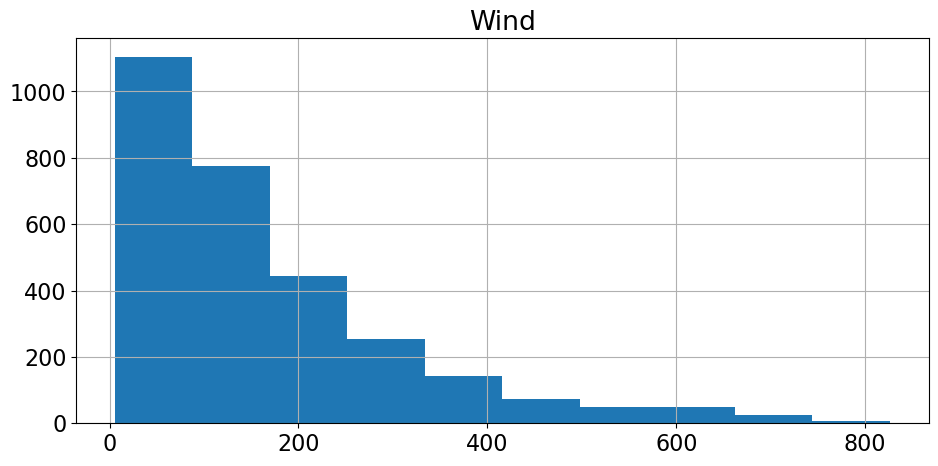

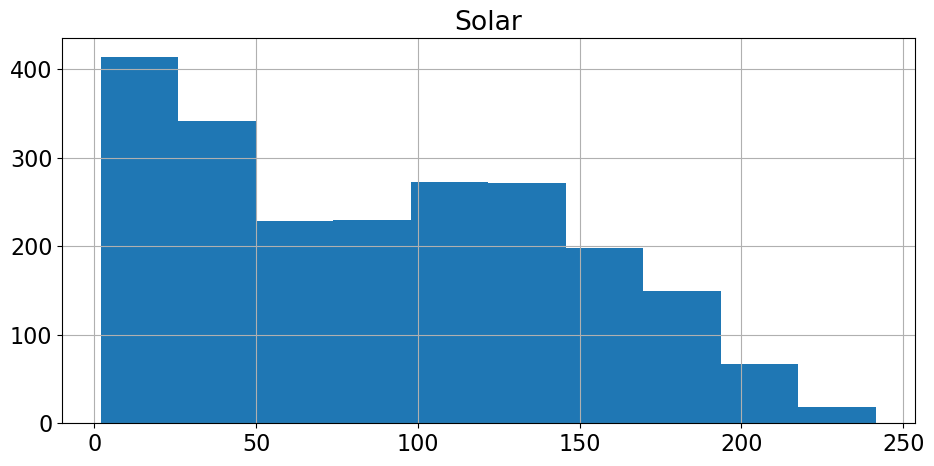

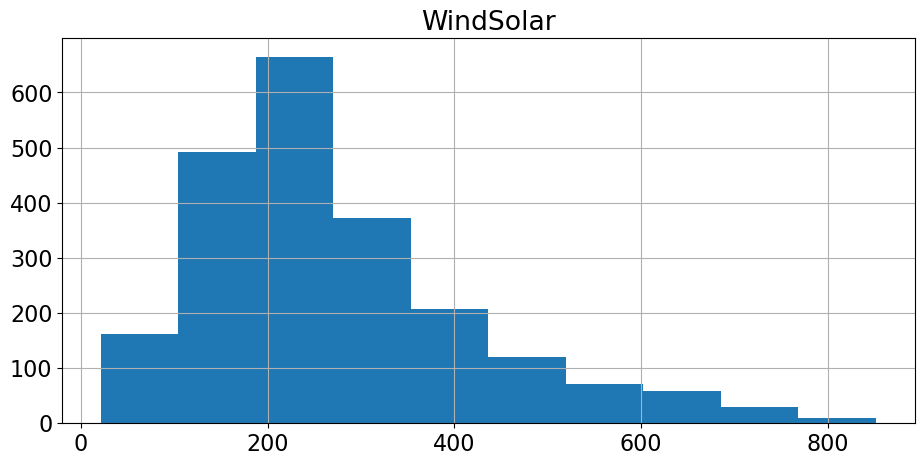

            Consumption  Wind  Solar  WindSolar  month  year
Date                                                        
2006-01-01     1069.184   0.0    0.0        0.0      1  2006
2006-01-02     1380.521   0.0    0.0        0.0      1  2006
2006-01-03     1442.533   0.0    0.0        0.0      1  2006
2006-01-04     1457.217   0.0    0.0        0.0      1  2006
2006-01-05     1477.131   0.0    0.0        0.0      1  2006


In [2]:
# Get the data from acquire.py and prep it via prepare.py

opsd_df = acquire.opsd_germany_daily()
df2 = prepare.prep_germany_data(opsd_df)

In [ ]:
######### write function for hist in this code

In [32]:
df2.head()

,consumption,wind,solar,wind+solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006


In [3]:
df2.shape

(4383, 6)

In [4]:
# A more-detailed look

df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         4383 non-null   float64
 2   Solar        4383 non-null   float64
 3   WindSolar    4383 non-null   float64
 4   month        4383 non-null   int32  
 5   year         4383 non-null   int32  
dtypes: float64(4), int32(2)
memory usage: 205.5 KB


In [5]:
# Use 70/30 train test split %

train2_size = .70
n = df2.shape[0]
test2_start_index = round(train2_size * n)
test2_start_index

3068

In [6]:
# Create train and test dataframe

train2 = df2[:test2_start_index] # everything up (not including) to the test_start_index
test2 = df2[test2_start_index:] # everything from the test_start_index to the end


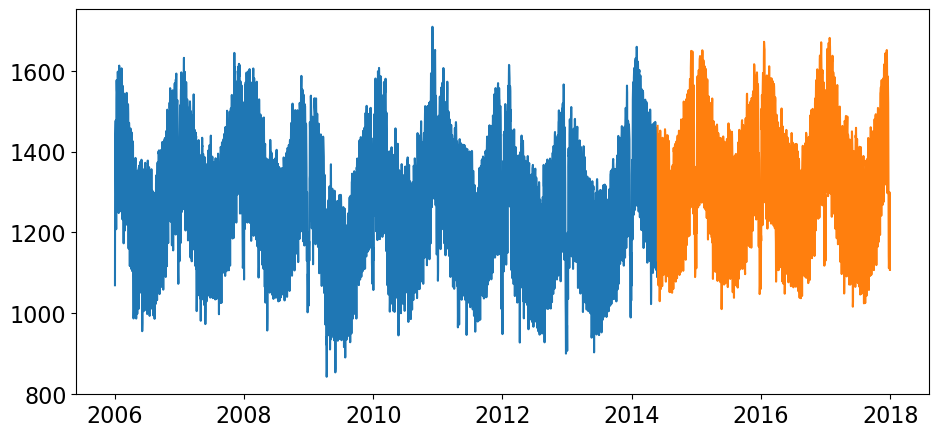

In [7]:
# Plot train2 and test2 with Consumption

plt.plot(train2.index, train2.Consumption)
plt.plot(test2.index, test2.Consumption)

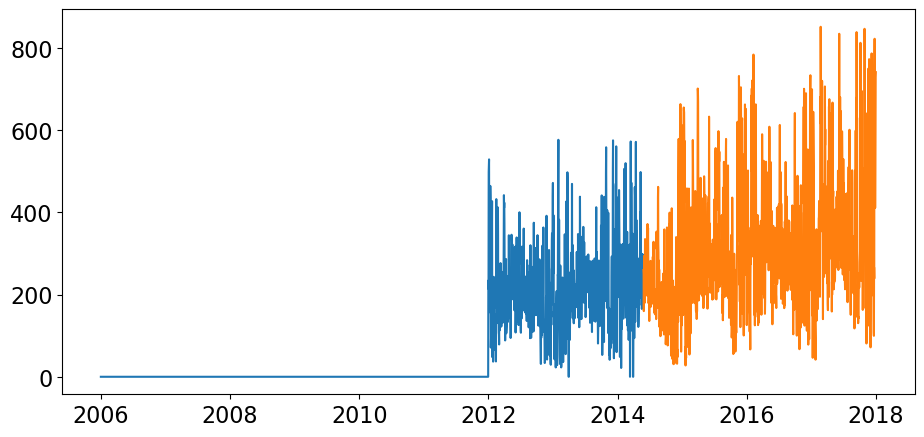

In [8]:
# Plot train2 and test2 with WindSolar

plt.plot(train2.index, train2.WindSolar)
plt.plot(test2.index, test2.WindSolar)

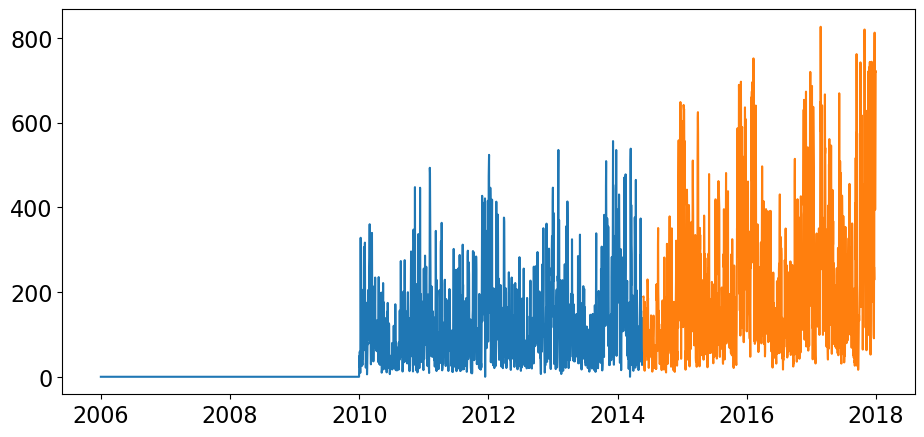

In [9]:
# Plot train2 and test2 with Wind

plt.plot(train2.index, train2.Wind)
plt.plot(test2.index, test2.Wind)

In [10]:
y=train2.Consumption
y.head()

Date
2006-01-01    1069.184
2006-01-02    1380.521
2006-01-03    1442.533
2006-01-04    1457.217
2006-01-05    1477.131
Name: Consumption, dtype: float64

<Axes: ylabel='Frequency'>

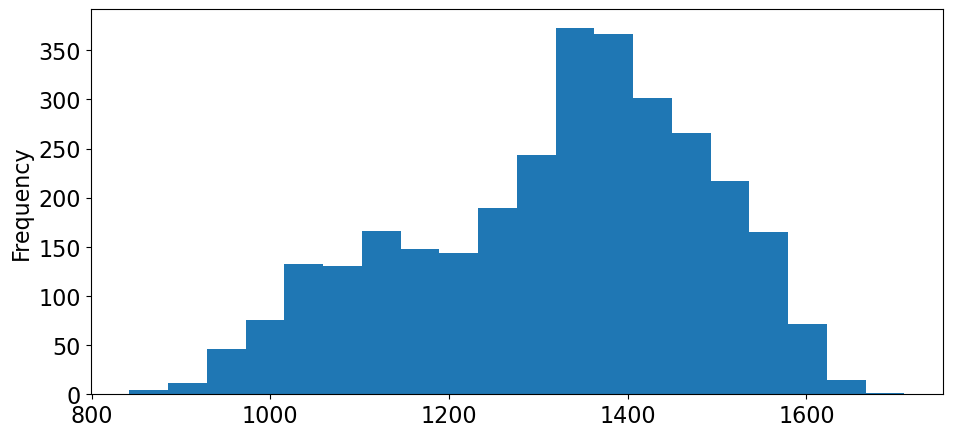

In [11]:
y.plot.hist(bins=20)

<Axes: xlabel='month'>

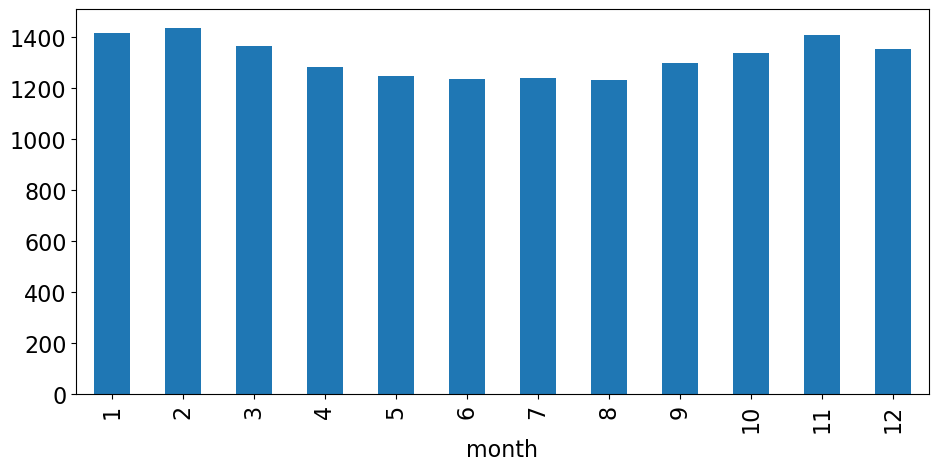

In [12]:
train2['month'] = train2.index.month
train2.groupby('month').Consumption.mean().plot.bar()

<Axes: xlabel='year'>

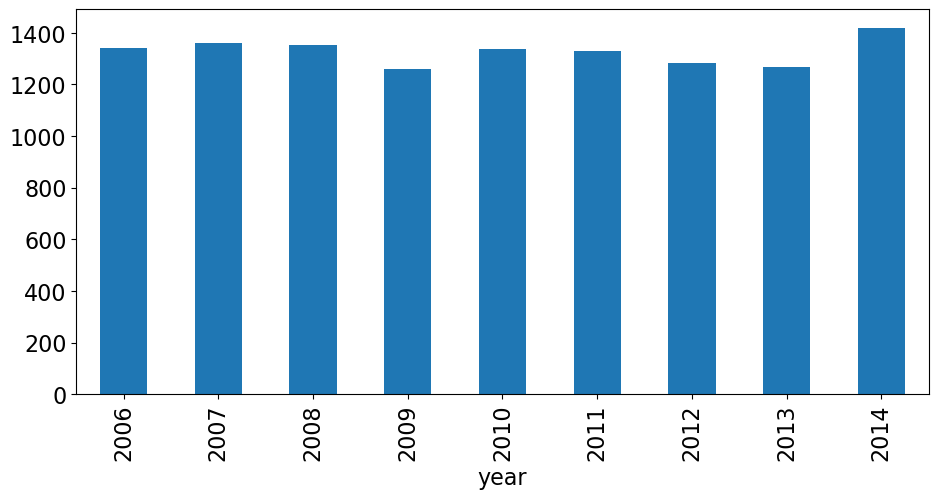

In [13]:
train2['year'] = train2.index.year
train2.groupby('year').Consumption.mean().plot.bar()

<Axes: xlabel='weekday', ylabel='Consumption'>

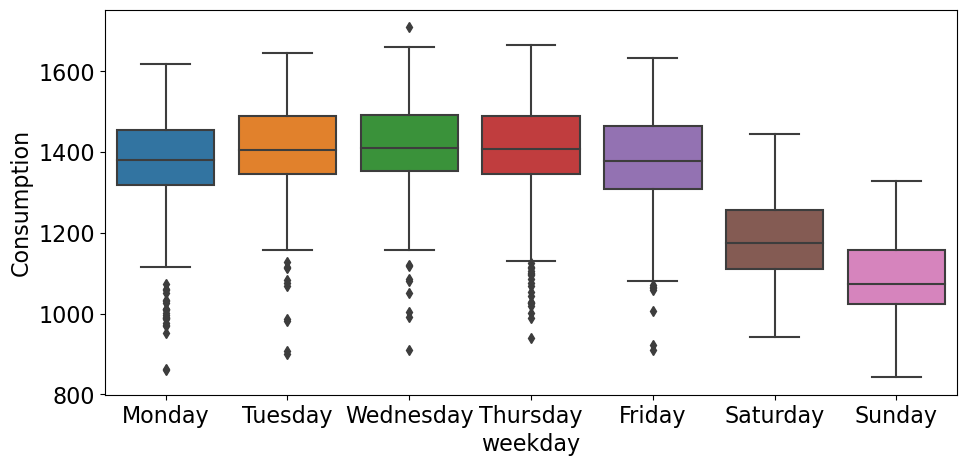

In [14]:
train2['weekday'] = train2.index.day_name()
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.boxplot(data=train2, y='Consumption', x='weekday', order=order)

In [15]:
# Consumption decomposition by week

y = train2.Consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
Date,,,,
2006-01-01,1069.184000,NaN,-68.437315,NaN
2006-01-08,1381.300143,NaN,-125.834756,NaN
2006-01-15,1486.730286,NaN,35.842411,NaN
2006-01-22,1490.031143,NaN,106.451350,NaN
2006-01-29,1514.176857,NaN,122.022124,NaN


<Axes: xlabel='Date'>

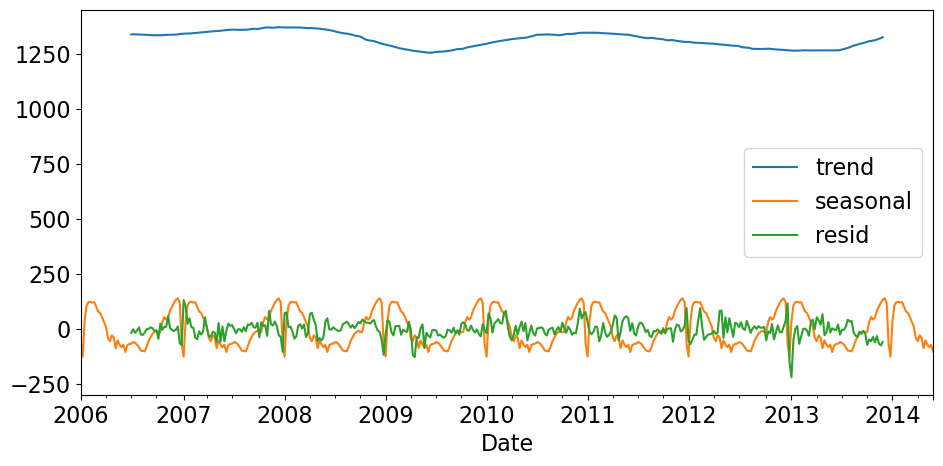

In [16]:
# Plot the decomposition by week

decomposition.iloc[:, 1:].plot()

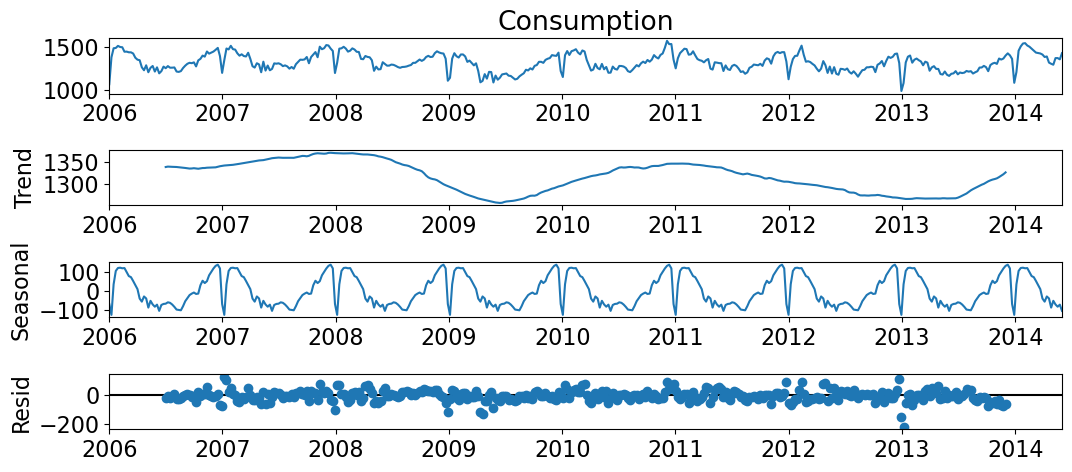

In [17]:
# the value returned from seasonal_decompose

result.plot()
None